# Regression Analysis of House Prices


In this work, I am going to predict house prices by regression analysis based on 79 kinds of feature values of a dataset of "House Prices: Advanced Regression Techniques" on Kaggle.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# download the dataset

df = pd.read_csv("train.csv")

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
# check the contents of the whole dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

    - There are 1460 samples on the dataset.
    
    - In addition to 79 feature values, 2 columns named "Id" and "SalePrice" respectively were added to the dataset.
    
    - There are 43 columns containing object values, so I need to handle them before regression analysis.

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

## [Task 1] Select 2 feature values


To prioritise the study of regression analysis and the practice of how to evaluate, I use only 2 feature values, "GrLivArea" and "YearBuilt".

In [6]:
# select the 2 feature values

df_GrLivArea = df.GrLivArea
df_YearBuilt = df.YearBuilt

table = pd.DataFrame({
    "GrLivArea": df_GrLivArea,
    "YearBuilt": df_YearBuilt
})

table

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
5,1362,1993
6,1694,2004
7,2090,1973
8,1774,1931
9,1077,1939


In [7]:
# check the contents of only the 2 feature values

table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
dtypes: int64(2)
memory usage: 22.9 KB


    - The dtypes of the 2 feature values are int.

In [8]:
table.describe()

,GrLivArea,YearBuilt
count,1460.000000,1460.000000
mean,1515.463699,1971.267808
std,525.480383,30.202904
min,334.000000,1872.000000
25%,1129.500000,1954.000000
50%,1464.000000,1973.000000
75%,1776.750000,2000.000000
max,5642.000000,2010.000000


In [9]:
table.isnull().sum()

GrLivArea    0
YearBuilt    0
dtype: int64

    - There are no missing values on the 2 feature values.

## [Task 2] Pipeline of Regression Analysis

In [50]:
# create and run the pipeline including fitting, prediction, evaluation and visualization by linear regression

# split the dataset of the 2 feature values into a train dataset and a test dataset
X = df.loc[:,["GrLivArea", "YearBuilt"]].values
y = df.SalePrice.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# init the classifier
lreg = LinearRegression()

# fitting
lreg.fit(X_train, y_train)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
# prediction
lreg_y_train_pred = lreg.predict(X_train)
lreg_y_test_pred = lreg.predict(X_test)

lreg_y_train_pred

array([169546.2754324 ,  86660.41007822, 197465.03890941, ...,
       106819.80717534, 132509.6095049 ,  86513.16263538])

In [52]:
lreg_y_test_pred

array([237395.68503653, 209426.71113347, 120385.00465352,  98807.94354593,
       138402.09715123, 277401.88468333, 292722.93061148, 187401.63362358,
       254791.44803588, 211359.73227601, 177977.90429633,  73890.57775408,
       221961.67010868, 221143.12953986, 225812.02720928, 113692.32289858,
       118794.7501066 , 144784.59883602, 189968.0566509 , 136026.61112057,
       144647.73186193, 162159.84769631, 215046.18739123, 235832.4655009 ,
        69160.36663025, 204263.69303064, 113708.2548815 , 195826.2658541 ,
       368007.53325853, 167091.12948711, 161791.49120863, 154684.10213647,
       122298.23421663,  95505.77690131, 143167.30927781, 253384.16449416,
       107186.47174535,  71729.92669446, 275068.64308727, 101831.07152663,
       176293.02720991, 136009.95657803,  84436.0310869 , 101000.4585714 ,
       227022.82224016, 192763.55471452,  96993.44291727, 195522.35985774,
       215043.77291395, 243586.52716504, 107283.50876212, 267010.19966558,
        81107.55199061, 2

In [53]:
# evaluation
lreg_train_score = mean_squared_error(y_train, lreg_y_train_pred)
lreg_test_score = mean_squared_error(y_test, lreg_y_test_pred)

lreg_train_score

2232606472.248212

In [54]:
lreg_test_score

2000178029.1389503

    - The mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and what is 
    estimated.

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


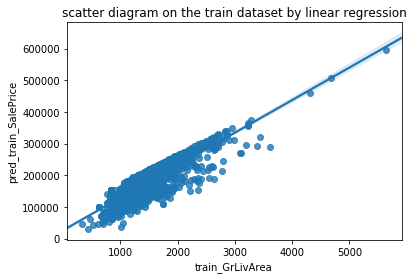

In [57]:
# visualization

sns.regplot(X_train[:,0], lreg_y_train_pred)

plt.title("scatter diagram on the train dataset by linear regression")
plt.xlabel("train_GrLivArea")
plt.ylabel("pred_train_SalePrice")
plt.show()

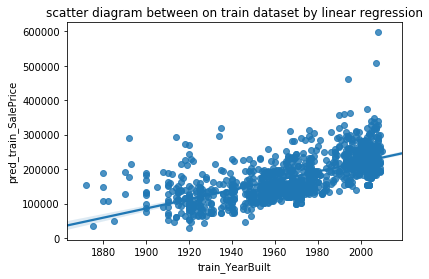

In [58]:
sns.regplot(X_train[:,1], lreg_y_train_pred)

plt.title("scatter diagram between on train dataset by linear regression")
plt.xlabel("train_YearBuilt")
plt.ylabel("pred_train_SalePrice")
plt.show()

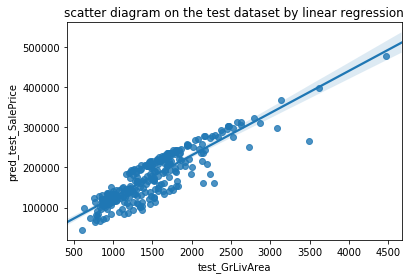

In [59]:
sns.regplot(X_test[:,0], lreg_y_test_pred)

plt.title("scatter diagram on the test dataset by linear regression")
plt.xlabel("test_GrLivArea")
plt.ylabel("pred_test_SalePrice")
plt.show()

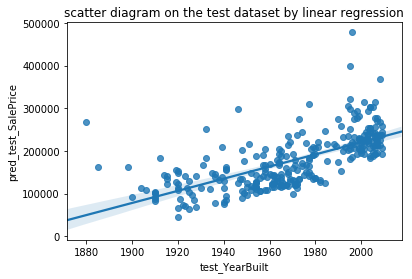

In [60]:
sns.regplot(X_test[:,1], lreg_y_test_pred)

plt.title("scatter diagram on the test dataset by linear regression")
plt.xlabel("test_YearBuilt")
plt.ylabel("pred_test_SalePrice")
plt.show()

    - "GrLivArea"と"SalePrice"には，trainとtestデータ共に，強い正の相関関係が見られるが，"YearBuilt"と"SalePrice"の相関は弱い．

## [Task 3] Compare Some Classifiers


Next, I am going to fit, predict, evaluate and visualize the dataset by SVM, decision tree and random forest, and compare those classifiers including linear regression.

### SVM

In [61]:
# SVM

# init the classifier
svrclf = SVR()

# fitting
svrclf.fit(X_train, y_train)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
# prediction
svrclf_y_train_pred = svrclf.predict(X_train)
svrclf_y_test_pred = svrclf.predict(X_test)

svrclf_y_train_pred

array([164943.99413244, 164943.99413244, 164945.99476229, ...,
       164943.99413244, 164941.64573582, 164943.99413244])

In [63]:
svrclf_y_test_pred

array([164945.62605958, 164944.99413244, 164943.85859366, 164941.72346188,
       164944.98302342, 164944.99413244, 164945.01244808, 164943.52293707,
       164944.9941347 , 164944.99413244, 164944.99413474, 164944.99379698,
       164945.49885337, 164944.99417784, 164945.094579  , 164944.99413244,
       164943.42798006, 164944.38719485, 164945.00087039, 164944.99379472,
       164944.38760178, 164944.99413244, 164945.07621744, 164945.63729488,
       164944.99379647, 164944.99413244, 164944.99413244, 164944.99413248,
       164944.99413244, 164944.38760178, 164944.99413244, 164943.78107112,
       164941.98159591, 164944.99413244, 164944.99413244, 164944.99413244,
       164944.99413244, 164944.99412968, 164944.99413244, 164944.99413244,
       164944.99413244, 164944.99112556, 164944.626253  , 164944.99413018,
       164944.99563599, 164944.9873945 , 164944.9941287 , 164945.1297946 ,
       164944.99433591, 164944.99413244, 164944.98302345, 164944.99413244,
       164944.99413244, 1

In [64]:
# evaluation
svrclf_train_score = mean_squared_error(y_train, svrclf_y_train_pred)
svrclf_test_score = mean_squared_error(y_test, svrclf_y_test_pred)

svrclf_train_score

6390109807.426893

In [65]:
svrclf_test_score

7249158070.012158

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


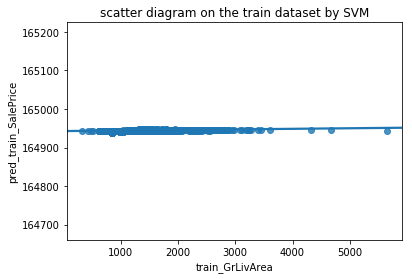

In [66]:
# visualization

sns.regplot(X_train[:,0], svrclf_y_train_pred)

plt.title("scatter diagram on the train dataset by SVM")
plt.xlabel("train_GrLivArea")
plt.ylabel("pred_train_SalePrice")
plt.show()

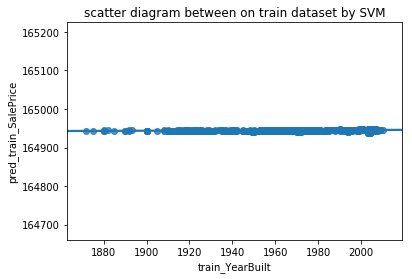

In [67]:
sns.regplot(X_train[:,1], svrclf_y_train_pred)

plt.title("scatter diagram between on train dataset by SVM")
plt.xlabel("train_YearBuilt")
plt.ylabel("pred_train_SalePrice")
plt.show()

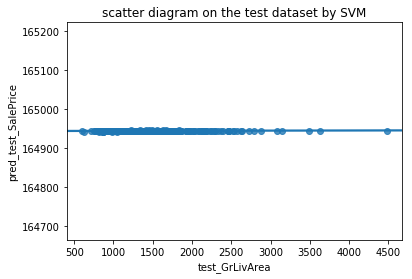

In [68]:
sns.regplot(X_test[:,0], svrclf_y_test_pred)

plt.title("scatter diagram on the test dataset by SVM")
plt.xlabel("test_GrLivArea")
plt.ylabel("pred_test_SalePrice")
plt.show()

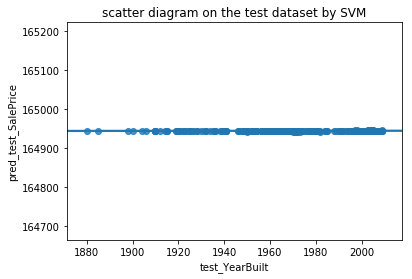

In [69]:
sns.regplot(X_test[:,1], svrclf_y_test_pred)

plt.title("scatter diagram on the test dataset by SVM")
plt.xlabel("test_YearBuilt")
plt.ylabel("pred_test_SalePrice")
plt.show()

### Decision Tree

In [72]:
# decision tree

# init the classifier
dtclf = DecisionTreeClassifier()

# fitting
dtclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
# prediction
dtclf_y_train_pred = dtclf.predict(X_train)
dtclf_y_test_pred = dtclf.predict(X_test)

dtclf_y_train_pred

array([145900, 106250, 164990, ..., 127000,  85400,  81000])

In [74]:
dtclf_y_test_pred

array([230000, 259500, 123000,  80000, 148000, 385000, 386250, 144152,
       326000, 175000, 184000,  99900, 245000, 178000, 251000, 116000,
       130000, 135000, 146000, 119500, 148000, 117500, 193000, 185000,
        96500, 167900, 105000, 165000, 582933, 112000, 145900, 137500,
       128500, 122900, 241500, 219500, 119000, 100000, 260000, 127000,
       219500, 135000, 119000,  81000, 200000, 135000, 110500, 179900,
       222000, 240000, 132000, 265979,  52500, 301500, 199900, 100000,
       108000, 192000, 108000, 201000, 180000, 340000,  87000, 133000,
       185750, 134500, 125000, 194500, 175000, 153000, 266500,  79000,
       340000, 146500, 145000, 229456, 168500,  76500, 248000, 185000,
       262500, 162900, 134900, 155000, 274900, 140000,  82500, 187500,
       213000, 184000, 167500, 147000, 120500, 140000, 112000, 116000,
       138500, 137500, 118500, 154000, 176000, 124500, 114504, 120500,
        93000, 138887, 164990, 144000, 143000, 755000, 128000, 145000,
      

In [75]:
# evaluation
dtclf_train_score = mean_squared_error(y_train, dtclf_y_train_pred)
dtclf_test_score = mean_squared_error(y_test, dtclf_y_test_pred)

dtclf_train_score

36436097.88099315

In [76]:
dtclf_test_score

3640414207.9863014

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


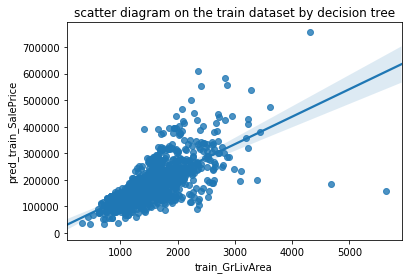

In [77]:
# visualization

sns.regplot(X_train[:,0], dtclf_y_train_pred)

plt.title("scatter diagram on the train dataset by decision tree")
plt.xlabel("train_GrLivArea")
plt.ylabel("pred_train_SalePrice")
plt.show()

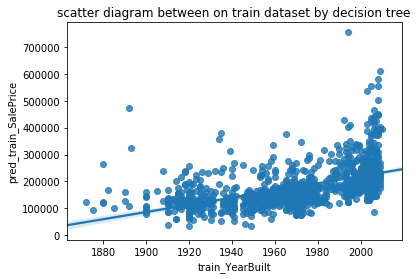

In [78]:
sns.regplot(X_train[:,1], dtclf_y_train_pred)

plt.title("scatter diagram between on train dataset by decision tree")
plt.xlabel("train_YearBuilt")
plt.ylabel("pred_train_SalePrice")
plt.show()

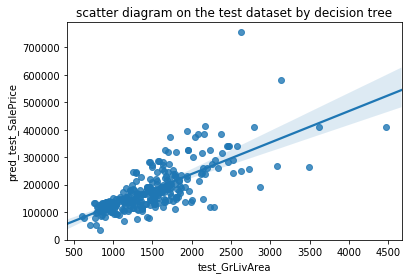

In [79]:
sns.regplot(X_test[:,0], dtclf_y_test_pred)

plt.title("scatter diagram on the test dataset by decision tree")
plt.xlabel("test_GrLivArea")
plt.ylabel("pred_test_SalePrice")
plt.show()

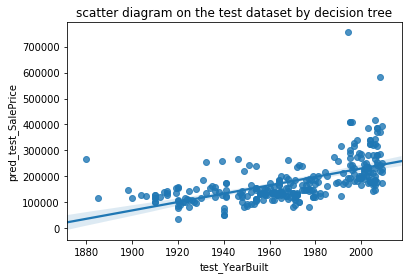

In [80]:
sns.regplot(X_test[:,1], dtclf_y_test_pred)

plt.title("scatter diagram on the test dataset by decision tree")
plt.xlabel("test_YearBuilt")
plt.ylabel("pred_test_SalePrice")
plt.show()

### Random Forest

In [81]:
# random forest

# init the classifier
rfclf =  RandomForestClassifier()

# fitting
rfclf.fit(X_train, y_train)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
# prediction
rfclf_y_train_pred = rfclf.predict(X_train)
rfclf_y_test_pred = rfclf.predict(X_test)

rfclf_y_train_pred

array([145900, 106250, 164990, ..., 127000,  89500,  81000])

In [83]:
rfclf_y_test_pred

array([236500, 235000, 123000,  80000, 159500, 385000, 386250, 144152,
       215000, 222000, 112000,  99900, 245000, 112000, 195000, 105000,
       130000, 135000, 118964, 135960, 148000, 117500, 188000, 255500,
        96500, 165000, 105000, 165000, 582933, 112000, 145900, 137500,
       128500, 100000, 132000, 219500,  80500,  99900, 225000,  98000,
       143000, 135000, 100000, 122900, 216000, 135000, 110500, 179900,
       264132, 262500, 132000, 475000, 119000, 269790, 199900, 118000,
       108000, 192000, 108000, 275000, 180500, 340000, 124000, 133000,
       180500, 134500, 132000, 194500, 175000, 156500, 359100, 143000,
       340000, 146500, 128000, 229456, 179200,  76500, 287000, 185000,
       262500, 162900, 134900, 155000, 222000, 140000, 150000, 151000,
       220000, 157000, 167500, 147000, 120500, 157900, 112000, 110000,
       145000, 137500, 149000, 154000, 135000, 124500, 114504, 120500,
        93000, 138887, 164990, 144000, 125000, 290000,  79000, 145000,
      

In [84]:
# evaluation
rfclf_train_score = mean_squared_error(y_train, rfclf_y_train_pred)
rfclf_test_score = mean_squared_error(y_test, rfclf_y_test_pred)

rfclf_train_score

89362077.7645548

In [85]:
rfclf_test_score

3001808284.0513697

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


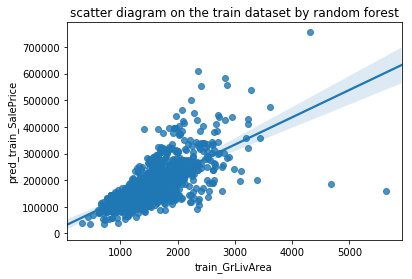

In [86]:
# visualization

sns.regplot(X_train[:,0], rfclf_y_train_pred)

plt.title("scatter diagram on the train dataset by random forest")
plt.xlabel("train_GrLivArea")
plt.ylabel("pred_train_SalePrice")
plt.show()

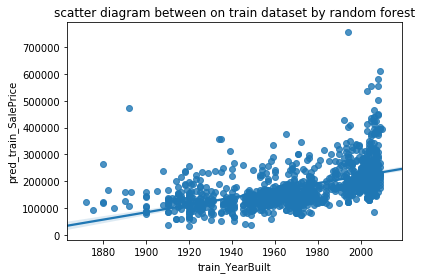

In [87]:
sns.regplot(X_train[:,1], rfclf_y_train_pred)

plt.title("scatter diagram between on train dataset by random forest")
plt.xlabel("train_YearBuilt")
plt.ylabel("pred_train_SalePrice")
plt.show()

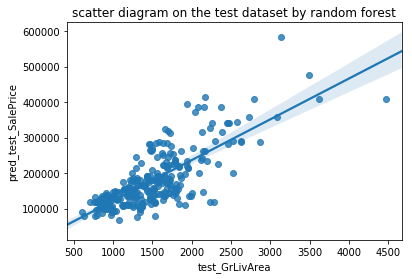

In [88]:
sns.regplot(X_test[:,0], rfclf_y_test_pred)

plt.title("scatter diagram on the test dataset by random forest")
plt.xlabel("test_GrLivArea")
plt.ylabel("pred_test_SalePrice")
plt.show()

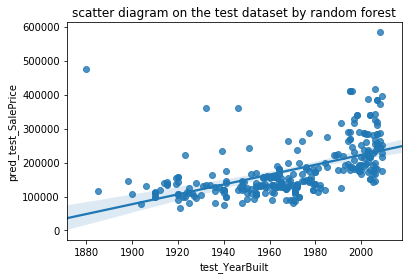

In [89]:
sns.regplot(X_test[:,1], rfclf_y_test_pred)

plt.title("scatter diagram on the test dataset by random forest")
plt.xlabel("test_YearBuilt")
plt.ylabel("pred_test_SalePrice")
plt.show()

In [90]:
# create a table of mean squared error evaluations

regression_analysis = [lreg_train_score, lreg_test_score]
SVM = [svrclf_train_score, svrclf_test_score]
decision_tree = [dtclf_train_score, dtclf_test_score]
random_forest = [rfclf_train_score, rfclf_test_score]

mse_table = pd.DataFrame({
    "regression_analysis": regression_analysis,
    "SVM": SVM,
    "decision_tree": decision_tree,
    "random_forest": random_forest},
    index=["train", "test"]
)

mse_table

,regression_analysis,SVM,decision_tree,random_forest
train,2.232606e+09,6.390110e+09,3.643610e+07,8.936208e+07
test,2.000178e+09,7.249158e+09,3.640414e+09,3.001808e+09


    - The mean squared error of the result of the decision tree on the train dataset is the most smallest. And the result of the regression analysis is the most smallest on the test dataset.
    
    - I do not know the reason why those scatter diagrams of SVM are strange. I 
    mean, just a single straight line is displayed on each diagram. When 
    using "plt.scatter", I can properly display scatter points.